In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

/tmp/ipykernel_1769999/1505154652.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read in the reports data 
df = pd.read_csv('../datasets/report_dataset_with_disease2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1719 non-null   int64  
 1   report_file     1719 non-null   object 
 2   body_part       1719 non-null   object 
 3   content         1719 non-null   object 
 4   conclusion      1719 non-null   object 
 5   disease_status  1719 non-null   int64  
 6   disease_type    1719 non-null   object 
 7   location        0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 107.6+ KB


In [3]:
nan_content_count = df['disease_type'].isna().sum()
print(f"Number of NaN values in the 'content' column: {nan_content_count}")

nan_rows = df[df['disease_type'].isna()]
print(nan_rows)

Number of NaN values in the 'content' column: 0
Empty DataFrame
Columns: [id, report_file, body_part, content, conclusion, disease_status, disease_type, location]
Index: []


In [4]:
# Get the size of each group
group_sizes = df.groupby('disease_type').size()

# Get the disease types that have less than 10 occurrences
small_groups = group_sizes[group_sizes < 10].index

# Filter out rows from df where disease_type is in small_groups
df = df[~df['disease_type'].isin(small_groups)]

In [5]:
df.head(5)

,id,report_file,body_part,content,conclusion,disease_status,disease_type,location
0,1,abodemen_3_posisi-2310200157_Series_1001-23102...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,tidak tampak kelainan radiologik.,0,normal,NaN
1,2,abodemen_3_posisi-2310220005_00001-report-1.txt,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,dilatasi ringan usus pada regio abdomen kanan ...,1,proses infeksi,NaN
2,3,abodemen_3_posisi-2310220062_Series_1001-repor...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,dilatasi ringan usus pada regio abdomen kiri d...,1,proses infeksi,NaN
3,4,abodemen_3_posisi-2310230006_Series_1001-repor...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,dilatasi ringan usus pada regio abdomen kanan ...,1,proses infeksi,NaN
5,6,abodemen_3_posisi-2310230083_Series_1001-repor...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,tidak tampak kelainan radiologik.,0,normal,NaN


In [6]:
df.drop(columns=["id", "report_file", "body_part", "conclusion", "disease_status", "location"], inplace=True)
df.head(5)

,content,disease_type
0,preperitoneal fat dan otot psoas line simetris...,normal
1,preperitoneal fat dan otot psoas line simetris...,proses infeksi
2,preperitoneal fat dan otot psoas line simetris...,proses infeksi
3,preperitoneal fat dan otot psoas line simetris...,proses infeksi
5,preperitoneal fat dan otot psoas line simetris...,normal


In [7]:
print('* Size of dataframe: {}\n'.format(df.shape))
group_sizes = df.groupby('disease_type').size()
pd.set_option('display.max_rows', None) 
print(group_sizes)

* Size of dataframe: (1608, 2)

disease_type
bronkhopneumonia                         14
cardiomegaly                             51
degenerative disc                        11
efusi pleura                             22
fraktur                                 206
hernia nucleus pulposus                  25
ileus                                    12
internal fiksasi                         14
internal fiksasi, fraktur                52
knee arthroplasty                        22
normal                                  726
osteoarthritis                           66
pneumonia                               129
pneumonia atau tb paru                   19
proses infeksi                           28
scoliosis                                13
sinusitis                                11
spondyloarthritis                        13
spondylolisthesis                        17
straight cervical, spondyloarthritis     30
straight lumbal                          30
straight lumbal, spondyloarthri

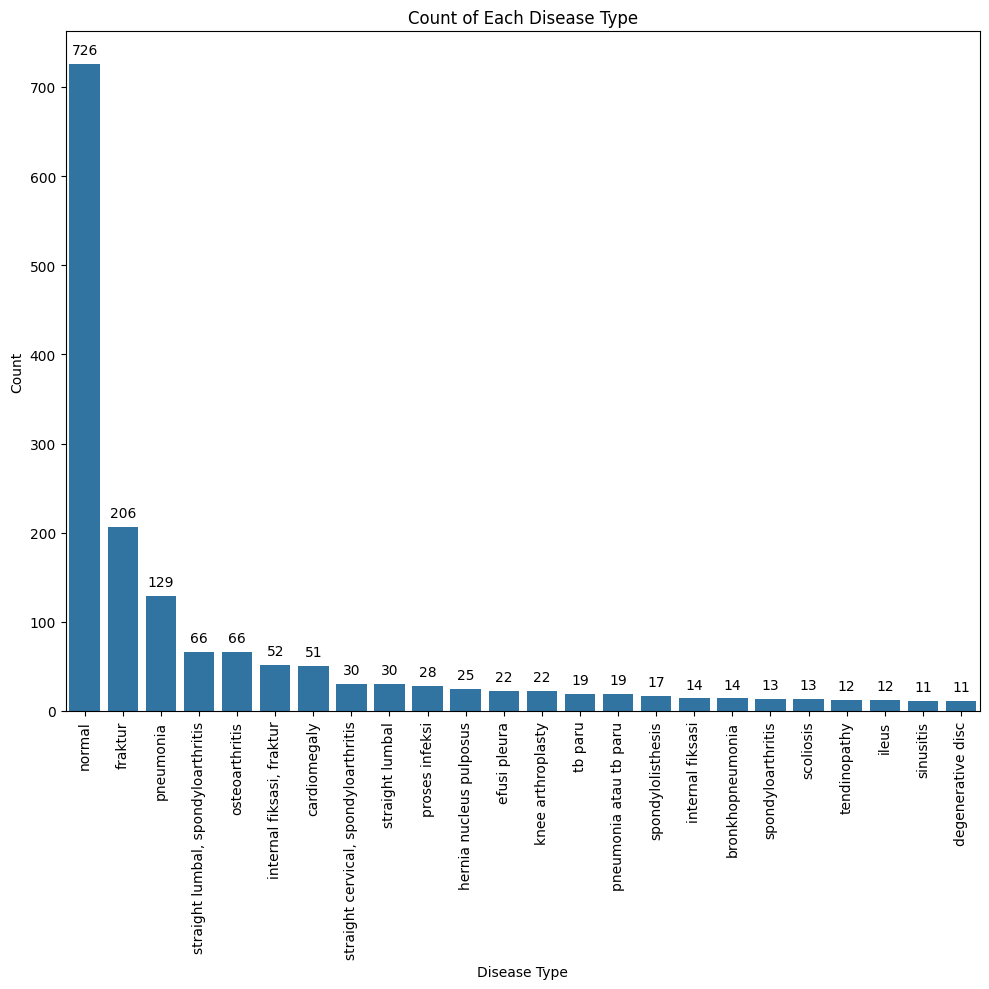

In [8]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='disease_type', data=df, order = df['disease_type'].value_counts().index)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.title('Count of Each Disease Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Assuming you want to downsample the 'normal' class
normal_data = df[df['disease_type'] == 'normal']
other_data = df[df['disease_type'] != 'normal']

# Downsample 'normal' data to a specified amount, for example 100
normal_downsampled = normal_data.sample(n=150, random_state=42)

# Combine downsampled 'normal' data with other data
df = pd.concat([other_data, normal_downsampled])

df.reset_index(drop=True, inplace=True)
df.head(5)

,content,disease_type
0,preperitoneal fat dan otot psoas line simetris...,proses infeksi
1,preperitoneal fat dan otot psoas line simetris...,proses infeksi
2,preperitoneal fat dan otot psoas line simetris...,proses infeksi
3,preperitoneal fat dan otot psoas line simetris...,proses infeksi
4,preperitoneal fat dan otot psoas line simetris...,proses infeksi


In [10]:
group_sizes = df.groupby('disease_type').size()
pd.set_option('display.max_rows', None) 
print(group_sizes)
print(f"Number of classes in body part: {df['disease_type'].nunique()}")

disease_type
bronkhopneumonia                         14
cardiomegaly                             51
degenerative disc                        11
efusi pleura                             22
fraktur                                 206
hernia nucleus pulposus                  25
ileus                                    12
internal fiksasi                         14
internal fiksasi, fraktur                52
knee arthroplasty                        22
normal                                  150
osteoarthritis                           66
pneumonia                               129
pneumonia atau tb paru                   19
proses infeksi                           28
scoliosis                                13
sinusitis                                11
spondyloarthritis                        13
spondylolisthesis                        17
straight cervical, spondyloarthritis     30
straight lumbal                          30
straight lumbal, spondyloarthritis       66
tb paru            

In [11]:
df['content'].sample(10)

841     kedudukan vertebra masih berubah. kelengkungan...
601     jantung kesan tidak membesar. aorta dan medias...
874     terpasang casting. tampak fraktur pada distal ...
334     alignment normal kifosis tak tampak adanya kel...
773     kedudukan vertebra masih baik. kelengkungan me...
848     kedudukan vertebra masih baik. kelengkungan th...
544     jantung kesan tidak membesar. aorta dan medias...
249     kedudukan tulang genu baik. struktur permukaan...
693     kedudukan vertebra berubah. tampak bergeser ke...
1028    preperitoneal fat dan otot psoas line simetris...
Name: content, dtype: object

In [12]:
import nltk
from nltk.corpus import stopwords
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from num2words import num2words
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


def to_lowercase(words_list):
    new_words_list = []
    for word in words_list:
        new_words_list.append(word.lower())
    return new_words_list

def remove_punctuations(words_list):
    new_words_list = []
    for word in words_list:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words_list.append(new_word)
    return new_words_list

def remove_stopwords(words_list):
    new_words_list = []
    stop_words = stopwords.words("indonesian")
    
    for word in words_list:
        if word not in stop_words:
            new_words_list.append(word)
            
    return new_words_list

def stem_words(words_list):
    ps = PorterStemmer()
    return [ps.stem(word) for word in words_list]

    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()
    # return [stemmer.stem(word) for word in words_list]

def lemmatize_verbs(words_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words_list]

def replace_numbers(words_list):
    new_words_list = []
    for word in words_list:
        if word.isdigit():
            new_word = num2words(int(word), lang='id')
            new_words_list.append(new_word)
        else:
            new_words_list.append(word)
    return new_words_list

def remove_non_ascii(words_list):
    new_words_list = []
    for word in words_list:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words_list.append(new_word)
    return new_words_list

def text_normalization(words):
    words = to_lowercase(words)
    words = remove_punctuations(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    # words = stem_words(words)
    # words = lemmatize_verbs(words)
    words = remove_non_ascii(words)
    return words

In [13]:
def tokenisasi(text):
    return nltk.word_tokenize(text)

def text_cleaning(text):
    text = re.sub("\n", " ", str(text))
    text = ' '.join([x for x in text_normalization(tokenisasi(text))])
    return text



def clean(text):
    text = re.sub("\n", " ", str(text))
    text = str(text).lower().split()

    text = remove_punctuations(text)
    text = ' '.join([x for x in text])
    
    return text

In [14]:
df['content'] = [clean(i) for i in df['content']]

In [15]:
df.sample(10)

,content,disease_type
929,kedudukan vertebra masih baik kelengkungan bai...,normal
406,jantung kesan tidak membesar aorta dan mediast...,pneumonia
1023,kedudukan tulang pedis baik struktur permukaan...,normal
311,kedudukan tulang siku relatif berubah tulangtu...,fraktur
268,terpasang internal fiksasi pada proximal femur...,fraktur
522,jantung kesan tidak membesar aorta dan mediast...,tb paru
863,kedudukan tulang tampak baik tampak fraktur ve...,fraktur
390,jantung kesan tidak membesar aorta dan mediast...,pneumonia atau tb paru
788,kedudukan dan kelengkungan vertebra melurus ta...,"straight lumbal, spondyloarthritis"
969,kedudukan tulang pedis baik struktur permukaan...,normal


In [16]:
# def oversample_data(X, y, size_per_category):
#     oversampled_data = pd.DataFrame()
#     for category in np.unique(y):
#         category_indices = np.where(y == category)[0]  # Get the indices of each category
#         oversample_indices = np.random.choice(category_indices, size=size_per_category, replace=True)  # Randomly sample with replacement
#         oversampled_category_data = X.iloc[oversample_indices]  # Get the actual data corresponding to the oversampled indices
#         oversampled_data = pd.concat([oversampled_data, oversampled_category_data])  # Combine with the oversampled data from other categories
        
#     return oversampled_data

def oversample_data(train_data, data_to_oversample, size_per_category):
    # Oversample each category in data_to_oversample to the specified size
    oversampled_data = pd.DataFrame()
    for category in data_to_oversample['disease_type'].unique():
        category_data = data_to_oversample[data_to_oversample['disease_type'] == category]
        oversampled_category_data = category_data.sample(n=size_per_category, replace=True)
        oversampled_data = pd.concat([oversampled_data, oversampled_category_data])
    
    # Concatenate the oversampled data with the original train_data
    train_data_oversampled = pd.concat([train_data, oversampled_data])
    
    # Shuffle the resulting DataFrame
    train_data_oversampled = train_data_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return train_data_oversampled

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['disease_type'] = le.fit_transform(df['disease_type'])

num_classes = len(le.classes_)

print("Number of classes:", num_classes)

Number of classes: 24


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 396 # max number of words from tokenized data vocab to be used
oov_token = '<OOV>' # out of vocabulary tokens & encoding test data sequences

tokenizer = Tokenizer(num_words=max_features, oov_token=oov_token)
tokenizer.fit_on_texts(df['content'])

max_len = max(df['content'].apply(lambda x: len(x.split())))

2024-05-27 17:02:53.460447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 17:02:53.485030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 17:02:53.485675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 17:02:53.906244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
embed_dim = 12
dropout_lstm = 0.5
lstm_out = 256

In [20]:
import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding 

model = Sequential()

model.add(Input(shape=(max_len,)))
model.add(Embedding(max_features+1, embed_dim))


model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(dropout_lstm))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(512, return_sequences = False)))
model.add(Dropout(dropout_lstm))
model.add(BatchNormalization())


model.add(Dense(24, activation='softmax'))

model.summary()

2024-05-27 17:02:54.331405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 17:02:54.335861: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 12)            4764      
                                                                 
 bidirectional (Bidirection  (None, 75, 512)           550912    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 512)           0         
                                                                 
 batch_normalization (Batch  (None, 75, 512)           2048      
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 1024)              4198400   
 onal)                                                           
                                                        

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

def preprocess_data(data, tokenizer, max_len):
    X = tokenizer.texts_to_sequences(data['content'])
    X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')
    return X

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['disease_type'], random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

val_accuracies = []
val_losses = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(skf.split(df_train['content'], df_train['disease_type'])):
    print(f"Training on fold {fold+1}...")
    train_df, val_df = df_train.iloc[train_index], df_train.iloc[val_index]

    data_to_oversample = train_df[~train_df['disease_type'].isin(['fraktur', 'normal', 'pneumonia'])].sample(frac=1)

    # Use the function to oversample the data
    # train_df = oversample_data(train_df, data_to_oversample, 120)

    X_train = preprocess_data(train_df, tokenizer, max_len)
    X_val = preprocess_data(val_df, tokenizer, max_len)
    y_train = to_categorical(train_df['disease_type'].values)
    y_val = to_categorical(val_df['disease_type'].values)

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    print("Padded training shape:", X_train.shape)
    print("Padded testing shape:", X_val.shape)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

    val_accuracies.append(history.history['val_accuracy'][-1])
    val_losses.append(history.history['val_loss'][-1])

    # Evaluate the model
    val_predictions = model.predict(X_val)
    predicted_labels = np.argmax(val_predictions, axis=1)
    true_labels =  np.argmax(y_val, axis=1)

    print("***Performance on Validation data***")
    # Calculate the accuracy score
    val_accuracy = accuracy_score(true_labels, predicted_labels)
    print(f'Test accuracy: {val_accuracy:.2f}')

Training on fold 1...
Padded training shape: (3168, 75)
Padded testing shape: (165, 75)
Epoch 1/50
99/99 [==============================] - 35s 334ms/step - loss: 1.6048 - accuracy: 0.5095 - val_loss: 3.5254 - val_accuracy: 0.0121
Epoch 2/50
99/99 [==============================] - 33s 330ms/step - loss: 0.8104 - accuracy: 0.7307 - val_loss: 4.9536 - val_accuracy: 0.1152
Epoch 3/50
99/99 [==============================] - 33s 331ms/step - loss: 0.5869 - accuracy: 0.7992 - val_loss: 3.7558 - val_accuracy: 0.1333
Epoch 4/50
99/99 [==============================] - 33s 333ms/step - loss: 0.4930 - accuracy: 0.8302 - val_loss: 3.0557 - val_accuracy: 0.2303
Epoch 5/50
99/99 [==============================] - 33s 330ms/step - loss: 0.5143 - accuracy: 0.8248 - val_loss: 1.0250 - val_accuracy: 0.7091
Epoch 6/50
99/99 [==============================] - 33s 330ms/step - loss: 0.6069 - accuracy: 0.8049 - val_loss: 6.2195 - val_accuracy: 0.0121
Epoch 7/50
99/99 [==============================] - 33

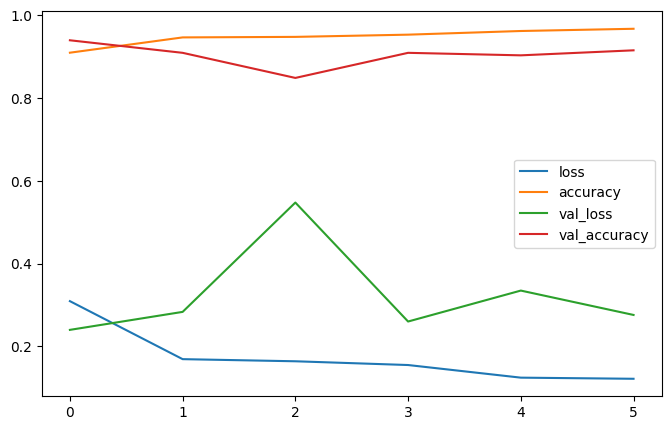

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score


X_test = preprocess_data(df_test, tokenizer, max_len)
y_test = to_categorical(df_test['disease_type'].values)

# Final evaluation on the held-out test set
test_predictions = model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate the final performance metrics
test_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Test set accuracy: {test_accuracy:.2f}')

test_f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'Test set f1: {test_f1:.2f}')

7/7 [==============================] - 1s 75ms/step
Test set accuracy: 0.92
Test set f1: 0.91


In [24]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

report = classification_report(true_labels, predicted_labels, target_names=le.classes_)
print("Classification Report:")
print(report)

Classification Report:
                                      precision    recall  f1-score   support

                    bronkhopneumonia       0.00      0.00      0.00         3
                        cardiomegaly       1.00      1.00      1.00        10
                   degenerative disc       1.00      1.00      1.00         2
                        efusi pleura       0.60      0.60      0.60         5
                             fraktur       1.00      0.98      0.99        41
             hernia nucleus pulposus       1.00      0.80      0.89         5
                               ileus       1.00      1.00      1.00         2
                    internal fiksasi       0.75      1.00      0.86         3
           internal fiksasi, fraktur       0.92      1.00      0.96        11
                   knee arthroplasty       1.00      1.00      1.00         4
                              normal       0.97      0.97      0.97        30
                      osteoarthritis    

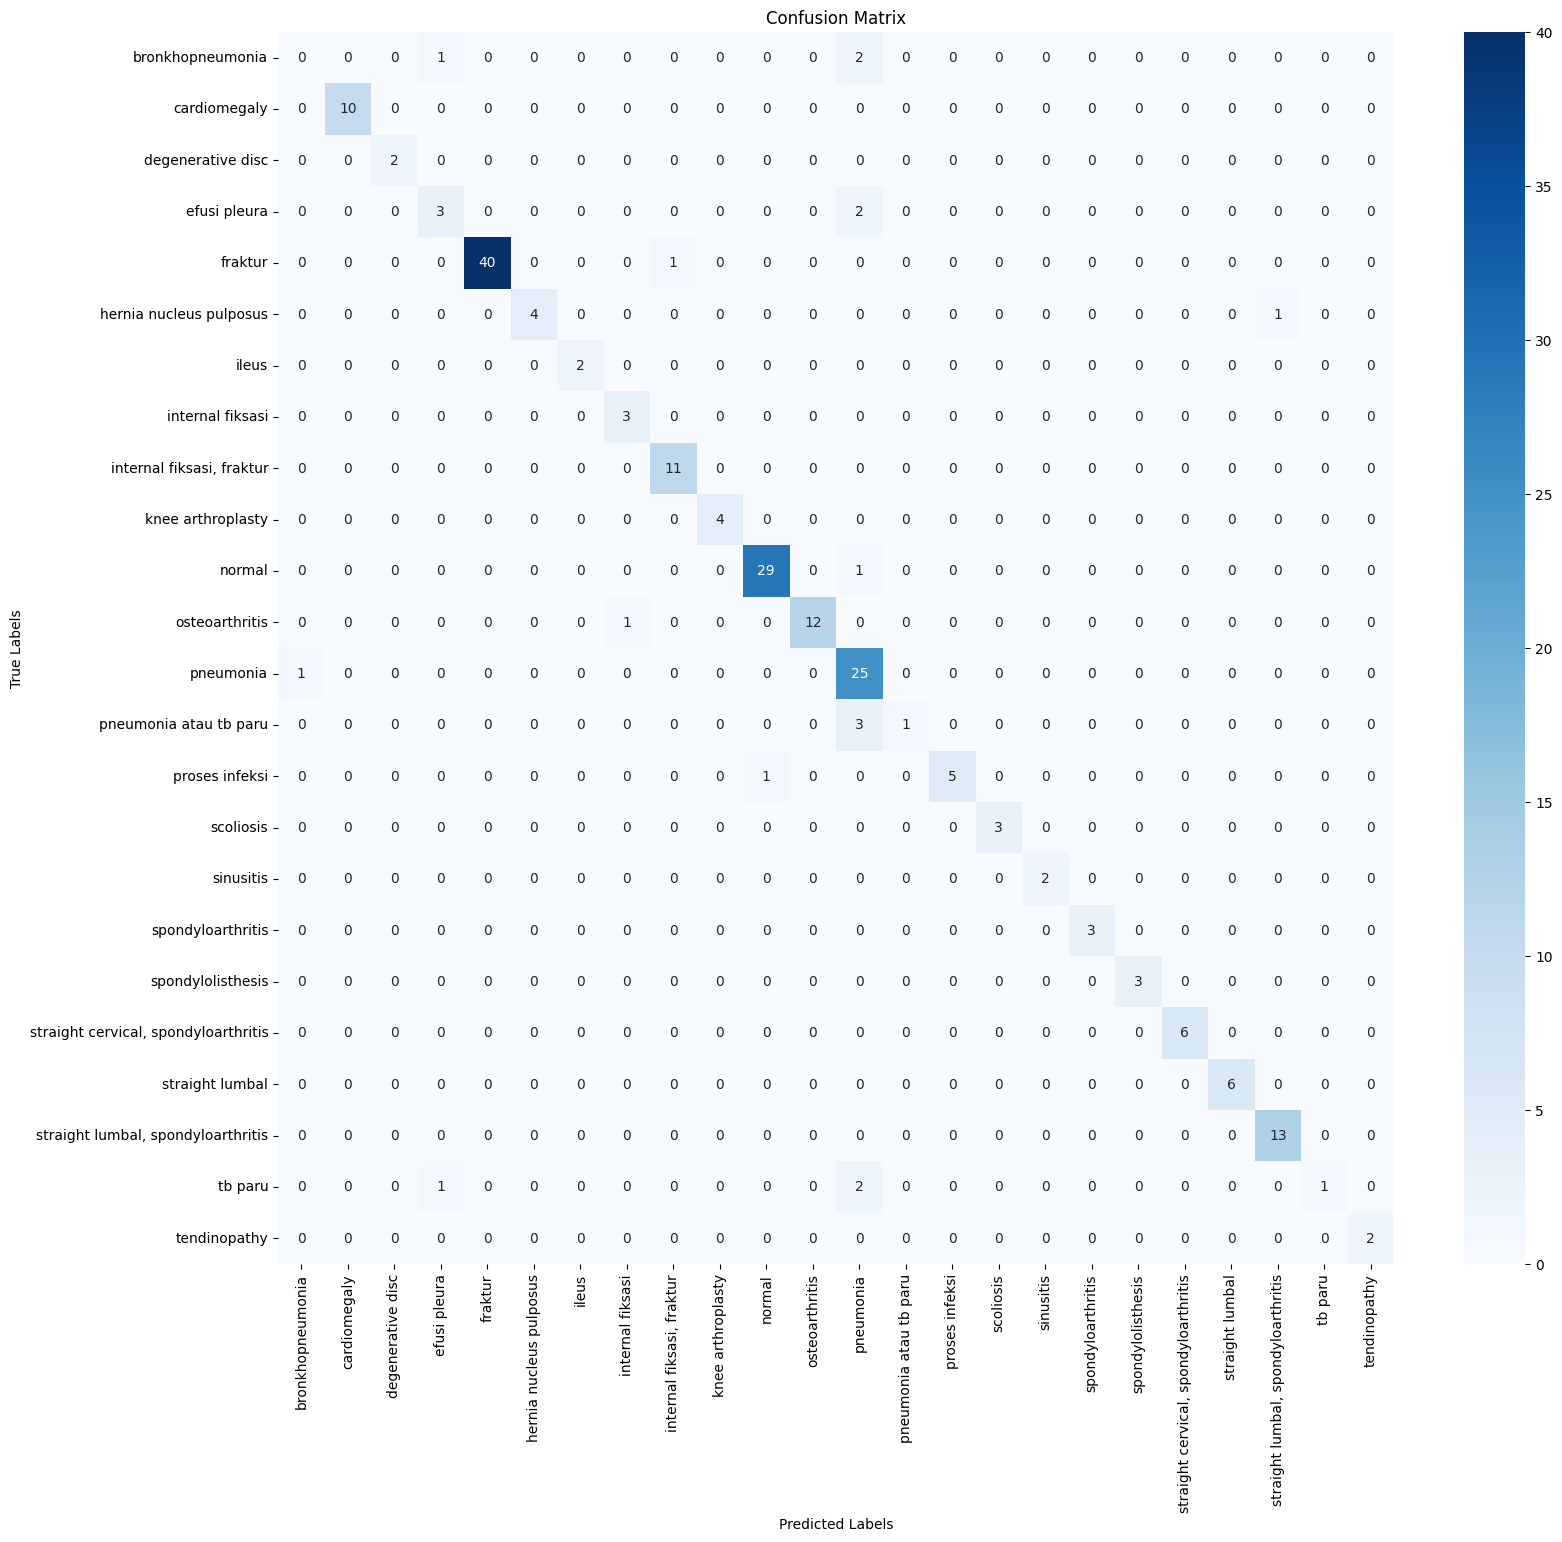

In [25]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(18, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
def go_predict(text, tokenizer, model, label_encoder, max_length=100, max_features=10000, oov_token='<OOV>'):
    # Preprocess the text
    text = clean(text)
    print(f"Cleaned text: {text}")

    # Tokenizer setup
    tokenizer.fit_on_texts([text])  # Fit only on the single text to generate the sequence
    
    # Convert text to sequence and pad it
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # Predict the class
    prediction = model.predict(padded_sequence)
    
    # Get the class with the highest probability
    predicted_class_idx = np.argmax(prediction, axis=1)
    predicted_class = label_encoder.inverse_transform(predicted_class_idx)

    print(f"Predicted class index: {predicted_class_idx}")
    
    return predicted_class[0]

In [27]:
input_text = "tampak ada fraktur di bagian os tabula"
predicted_class = go_predict(input_text, tokenizer, model, le, max_len)
print(f"The predicted class for the input text is: {predicted_class}")

Cleaned text: tampak ada fraktur di bagian os tabula
1/1 [==============================] - 0s 24ms/step
Predicted class index: [4]
The predicted class for the input text is: fraktur


In [28]:
input_text1 = "kedudukan tulang tampak baik tak tampak fraktur destruksi dislokasi maupun indikasi penyakit litik atau blastik lainnya celah sendi glenohumeral sendi menyempit jaringan lunak tak tampak indikasi penyakit kelainan"
predicted_class = go_predict(input_text1, tokenizer, model, le, max_len)
print(f"The predicted class for the input text is: {predicted_class}")

Cleaned text: kedudukan tulang tampak baik tak tampak fraktur destruksi dislokasi maupun indikasi penyakit litik atau blastik lainnya celah sendi glenohumeral sendi menyempit jaringan lunak tak tampak indikasi penyakit kelainan
1/1 [==============================] - 0s 22ms/step
Predicted class index: [10]
The predicted class for the input text is: normal


In [29]:
print(df_test.iloc[16].to_dict())

{'content': 'jantung kesan membesar cardiothoracic ratio setengah aorta dan mediastinum atas tidak melebar trakhea di garis tengah kedua hilus tidak menebal tampak infiltrat pada lapangan bawah kanan lengkung diafragma regular sinus kostofrenikus kanan tumpul kiri lancip', 'disease_type': 1}
